### 1. Import Dependencies

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv('Data/Processed/ChurnModelling_imputed.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
# df.head()

In [121]:
print(f"No of Rows {len(df)}")

No of Rows 7043


### 3. Outlier Detection Techniques

#### 3.1 Distribution Plot

In [122]:
categorical_columns = [ 'gender', 'SeniorCitizen', 'Dependents', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'HasInternet']

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [123]:
len(categorical_columns), len(numerical_columns)

(18, 3)

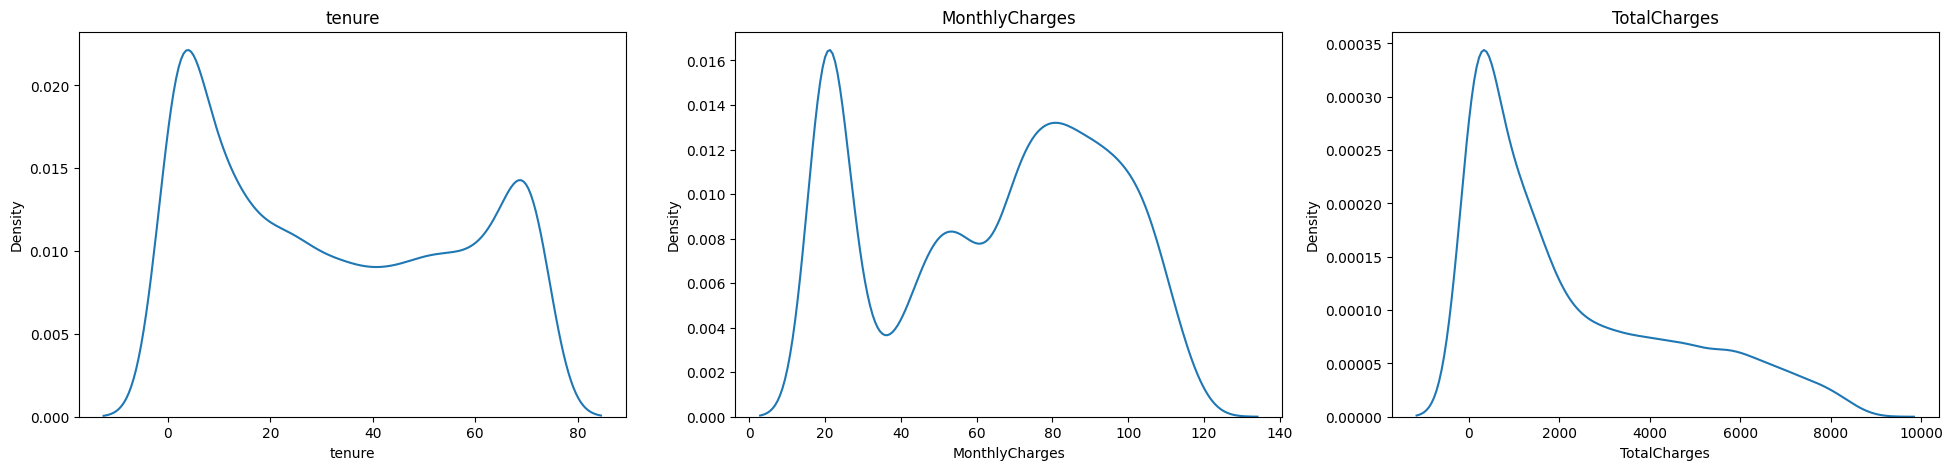

In [124]:
fig, axes = plt.subplots(1,3 , figsize=(24, 5))

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(df[col], ax=axes[idx])
    axes[idx].set_title(col)

plt.show()

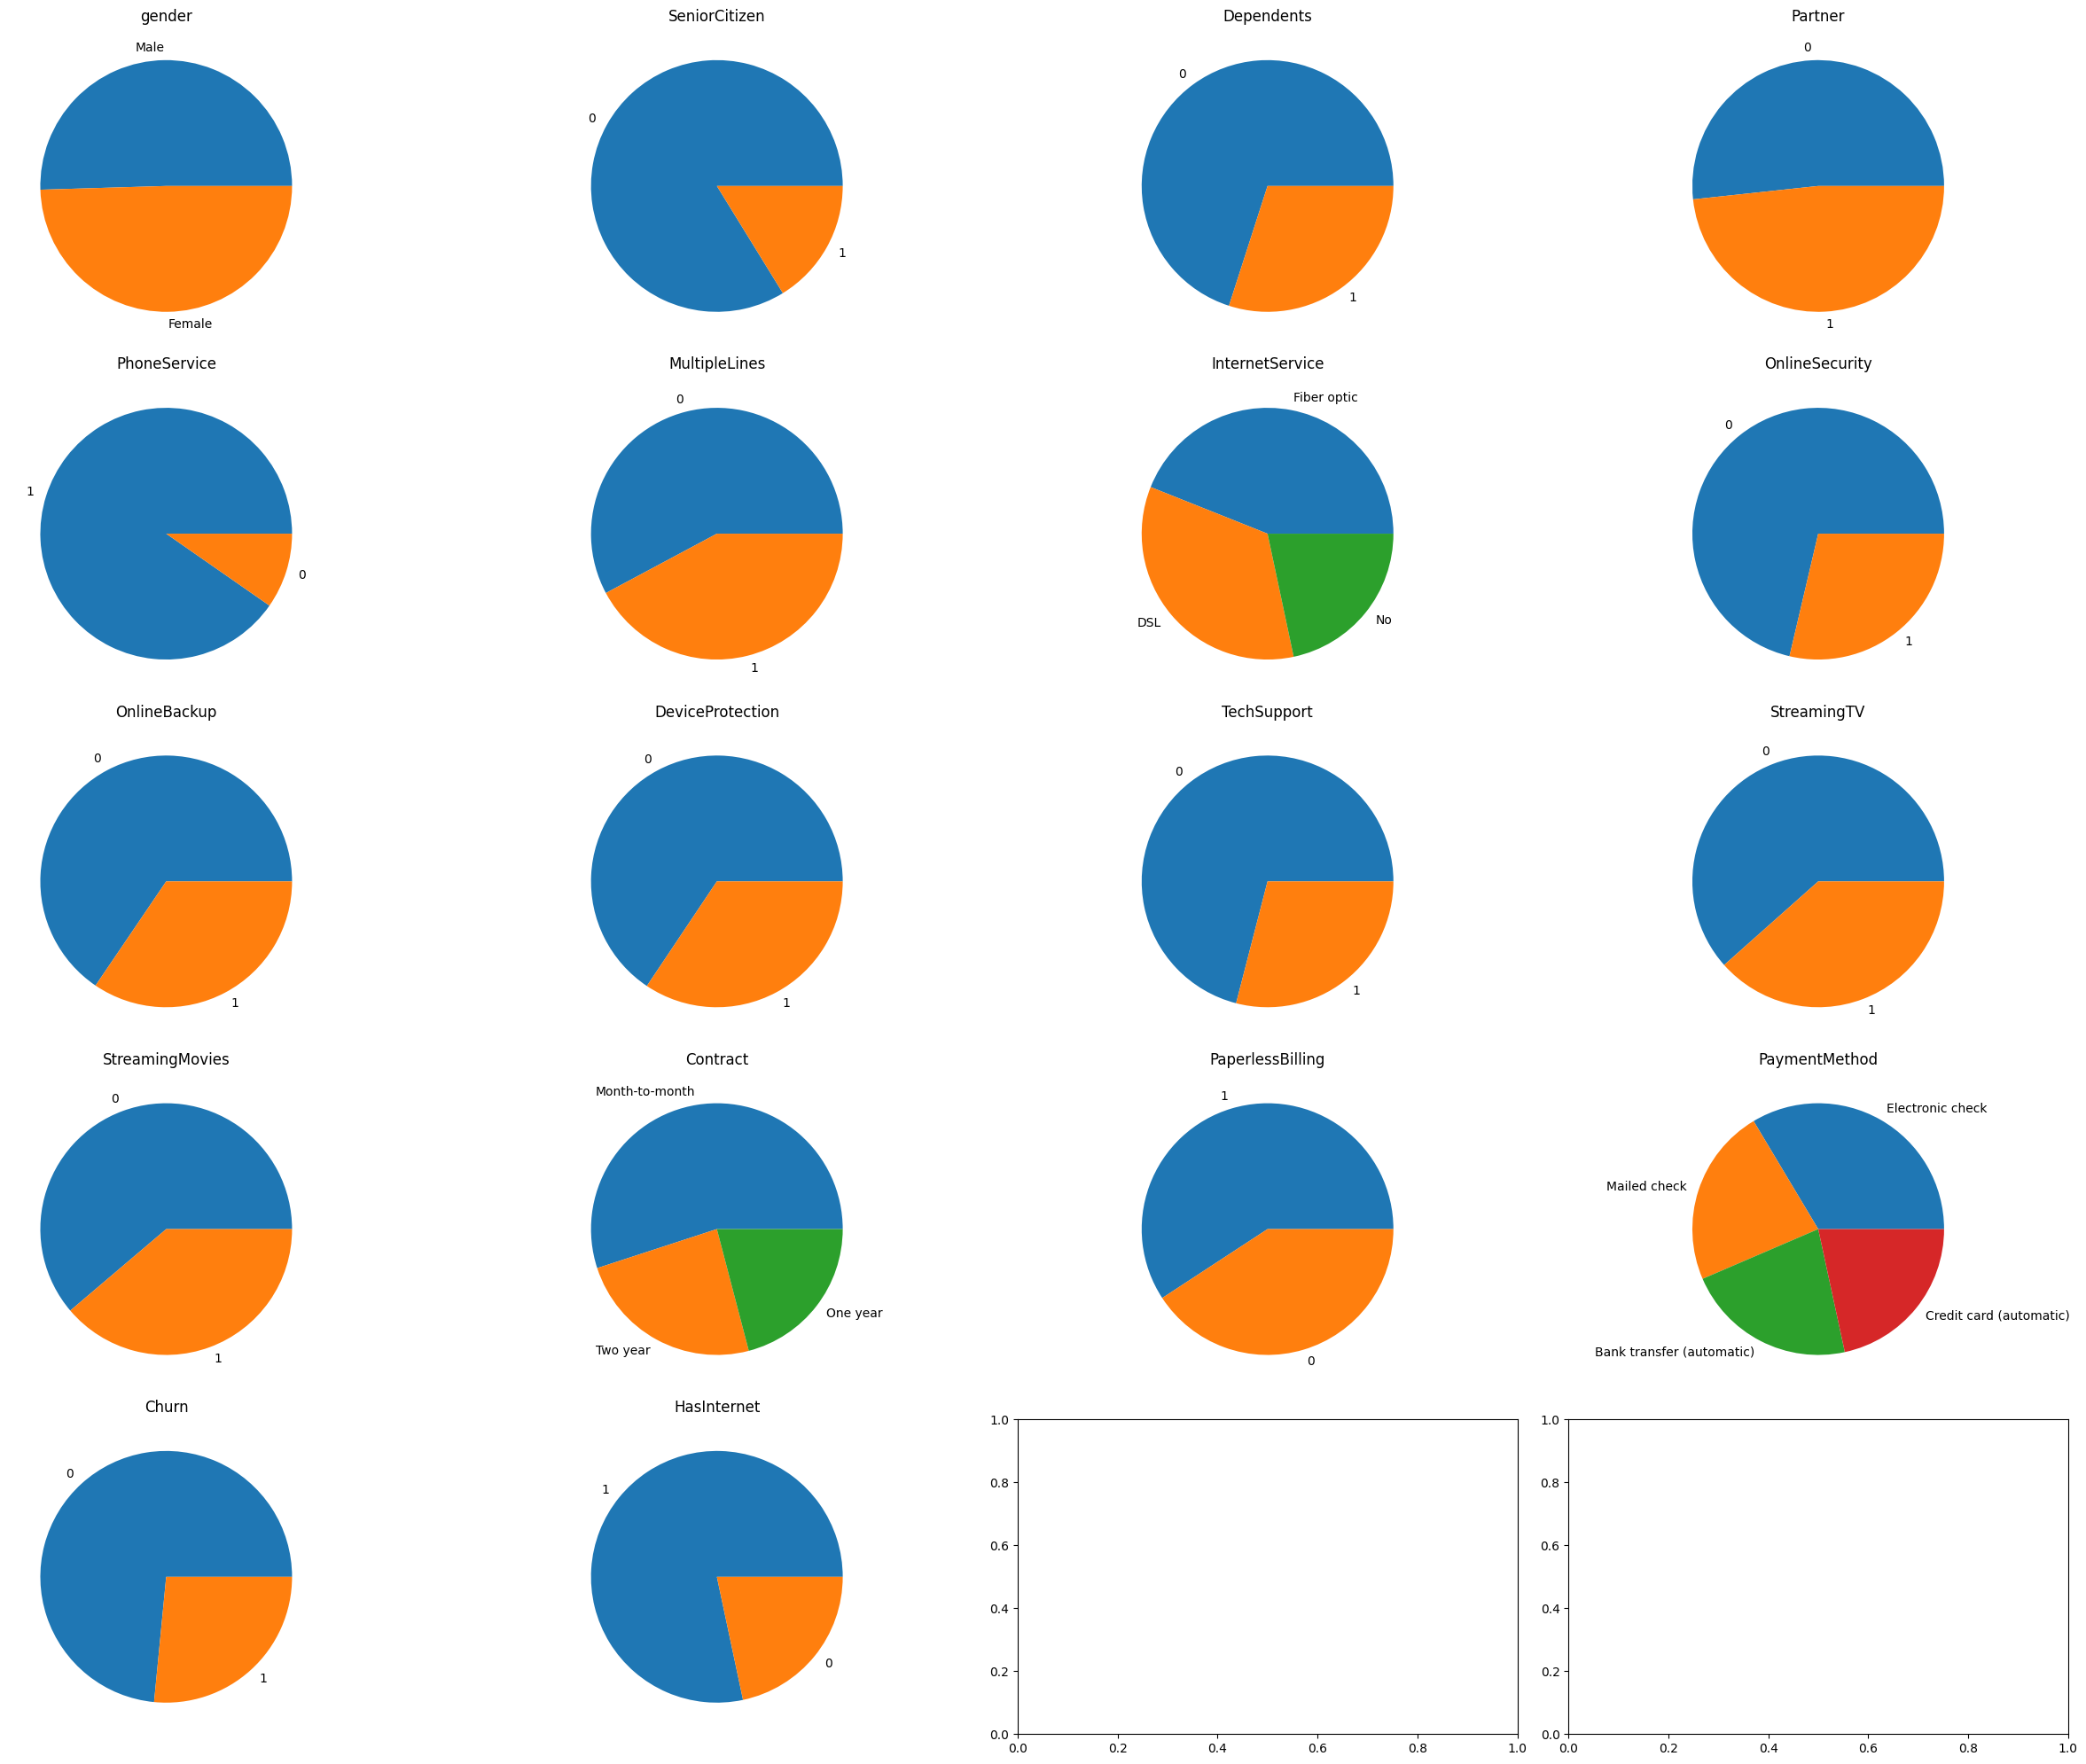

In [125]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier indexing

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                            kind='pie',
                            ax=axes[idx]
                            )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

plt.tight_layout()  # Add this for better spacing
plt.show()

#### 3.2 Box Plots

<Axes: ylabel='TotalCharges'>

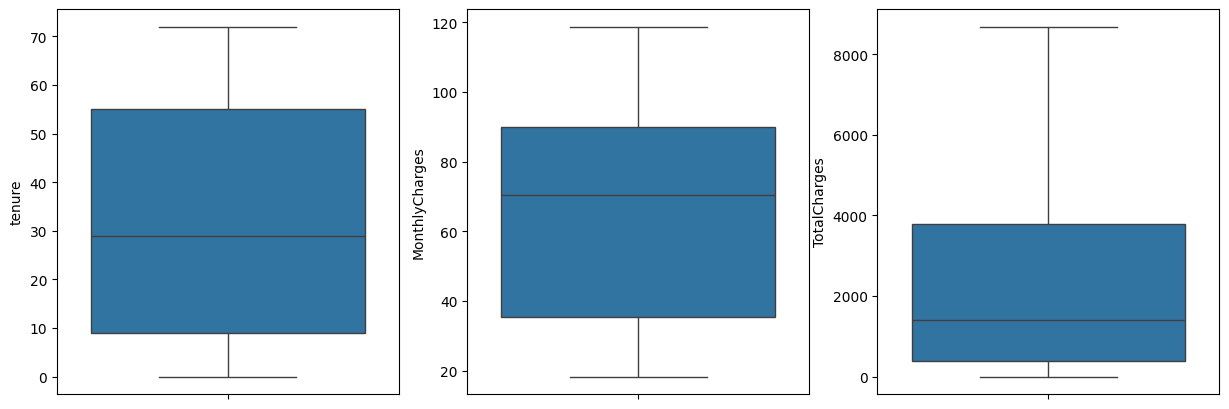

In [126]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df['tenure'], ax=axes[0])
sns.boxplot(data=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(data=df['TotalCharges'], ax=axes[2])

#### 3.3 Emperical Rule / 3-Sigma Rule

In [127]:
def find_anomaly(data):

    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3*std)
    lower_bound = mean - (3*std)

    return (data > upper_bound) | (data < lower_bound)

In [128]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentages = round(n_outliers/ len(df), 4)
    print(f"{col} has {n_outliers} outliers ({n_outliers_percentages*100}%)")

tenure has 0 outliers (0.0%)
MonthlyCharges has 0 outliers (0.0%)
TotalCharges has 0 outliers (0.0%)


#### 3.4 IQR Method

In [129]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    return (data > upper_bound) | (data < lower_bound)


In [130]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentages = round(n_outliers/ len(df), 4)
    print(f"{col} has {n_outliers} outliers ({n_outliers_percentages*100}%)")

tenure has 0 outliers (0.0%)
MonthlyCharges has 0 outliers (0.0%)
TotalCharges has 0 outliers (0.0%)


In [131]:
df.to_csv('Data/Processed/ChurnModelling_Outlier_Handled.csv', index=False)